In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("11-iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.drop("Id", axis=1, inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

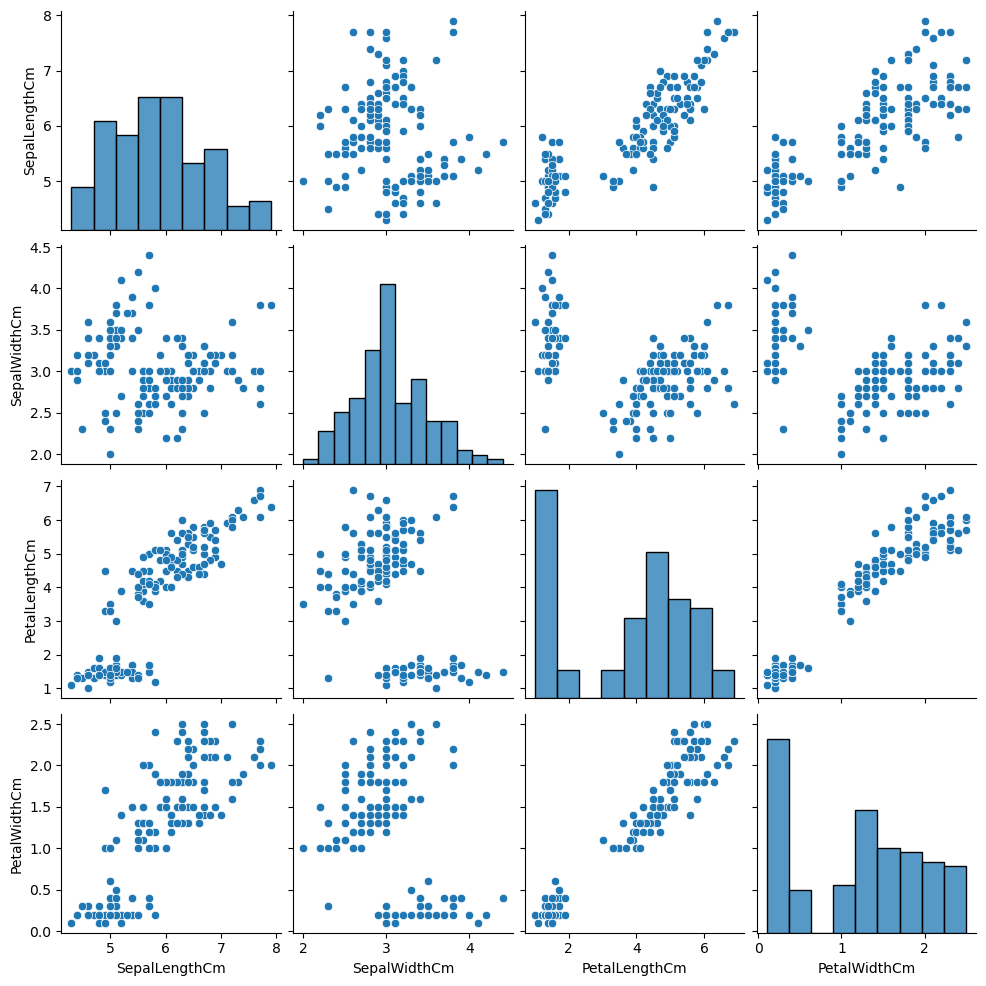

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


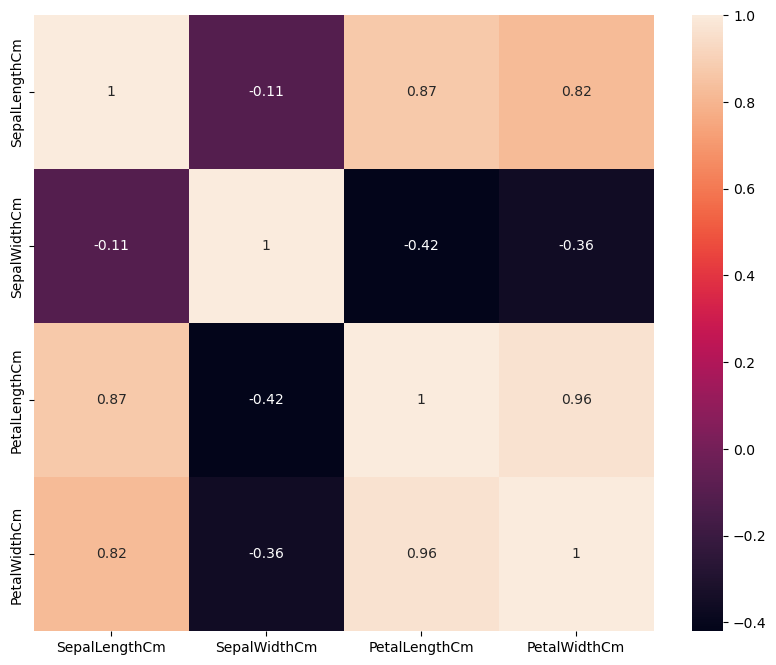

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

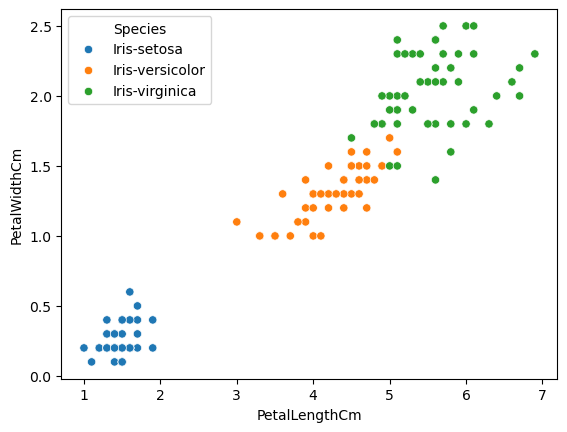

In [13]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

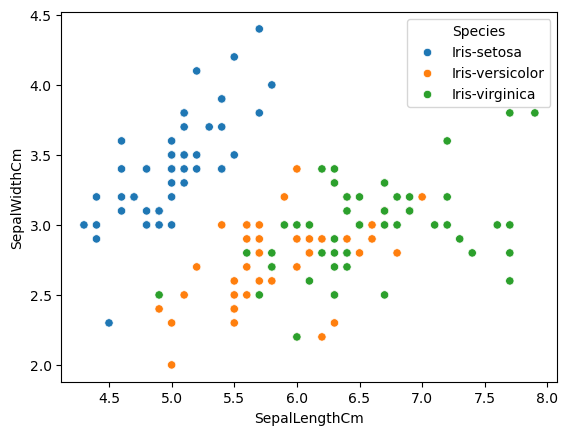

In [14]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Species"])
plt.show()

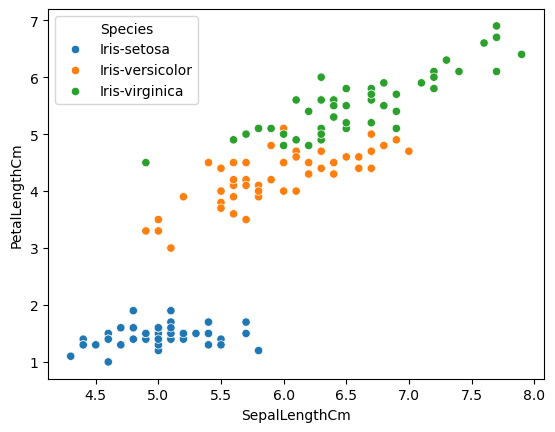

In [15]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["PetalLengthCm"], hue=df["Species"])
plt.show()

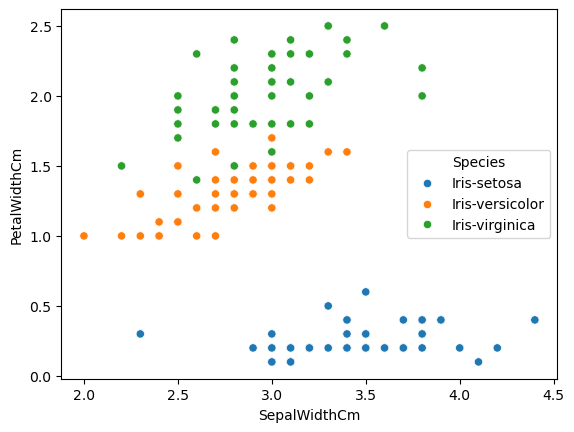

In [16]:
sns.scatterplot(x=df["SepalWidthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)
y_pred = logistic.predict(X_test_scaled)

In [28]:
print("Accuracy Score: ", accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))

Accuracy Score:  0.9736842105263158
Confusion Matrix: 
 [[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [29]:
# Hyperparameter Tuning

In [30]:
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga", "newton-cholesky"]
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [31]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)

In [35]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'C': 10, 'class_weight': {0: 100, 1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [37]:
y_pred = grid.predict(X_test_scaled)

In [38]:
print("Accuracy Score: ", accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))

Accuracy Score:  0.9736842105263158
Confusion Matrix: 
 [[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

